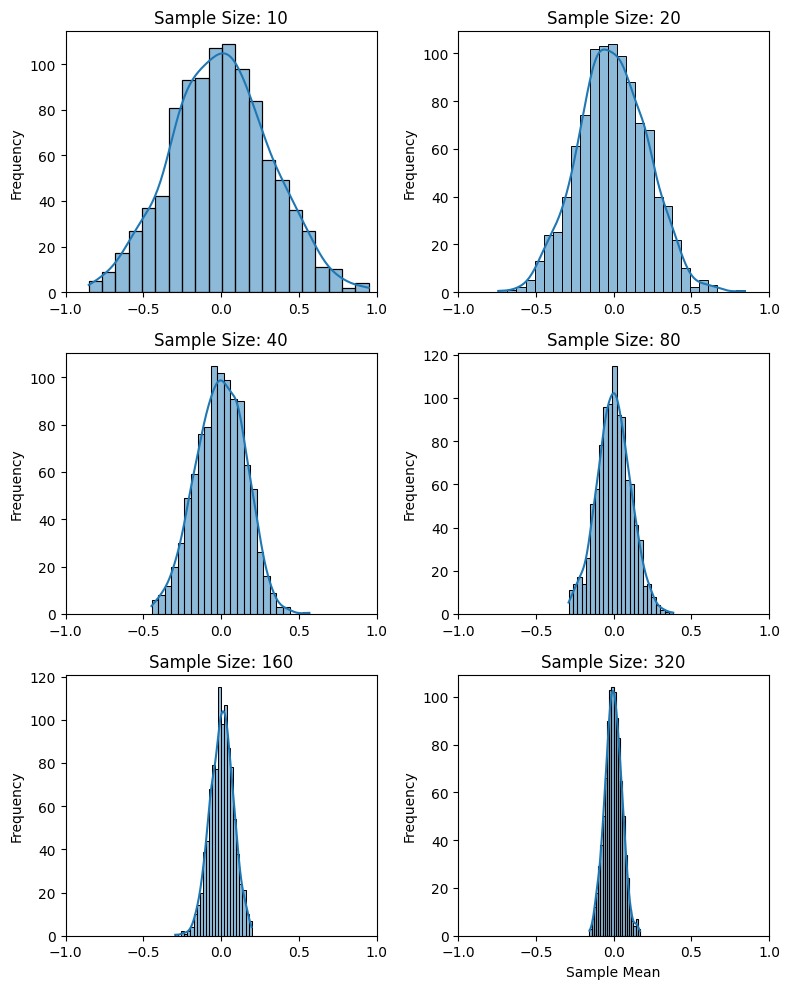

   Sample Size  Sample STD  Theoretical STD
0           10    0.315941         0.316228
1           20    0.222236         0.223607
2           40    0.158405         0.158114
3           80    0.110734         0.111803
4          160    0.075393         0.079057
5          320    0.054641         0.055902


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# 设置正态分布的参数
mu = 0  # 均值
sigma = 1  # 标准差

# 设置样本量和重复次数
sample_sizes = [10, 20, 40, 80, 160, 320]  # 样本量
num_iterations = 1000  # 重复次数

# 初始化抽样均值的列表
sample_means = []

# 进行模拟实验
for sample_size in sample_sizes:
    means = []
    for _ in range(num_iterations):
        # 从正态分布中抽样
        samples = np.random.normal(mu, sigma, sample_size)
        # 计算抽样的均值
        sample_mean = np.mean(samples)
        means.append(sample_mean)
    sample_means.append(means)

# 绘制抽样分布的图
fig, axs = plt.subplots(math.ceil(len(sample_sizes) / 2), 2, figsize=(8, 10))
for i, means in enumerate(sample_means):
    x, y = i // 2, i % 2
    #axs[x][y].hist(means, bins=30, density=True, alpha=0.7)
    sns.histplot(means, kde=True, ax=axs[x][y])
    axs[x][y].set_ylabel('Frequency')
    axs[x][y].set_title('Sample Size: {}'.format(sample_sizes[i]))
    axs[x][y].set_xlim([-1, 1])  # 设置x轴范围
plt.xlabel('Sample Mean')
plt.tight_layout()
plt.show()

# 计算抽样均值分布的方差
sample_variances = [np.var(means) for means in sample_means]

# 计算理论值方差
theoretical_variance = sigma**2 / np.array(sample_sizes)

# 创建DataFrame打印结果
results = pd.DataFrame({'Sample Size': sample_sizes,
                        'Sample STD': np.sqrt(sample_variances),
                        'Theoretical STD': np.sqrt(theoretical_variance)})
print(results)

<Axes: ylabel='Count'>

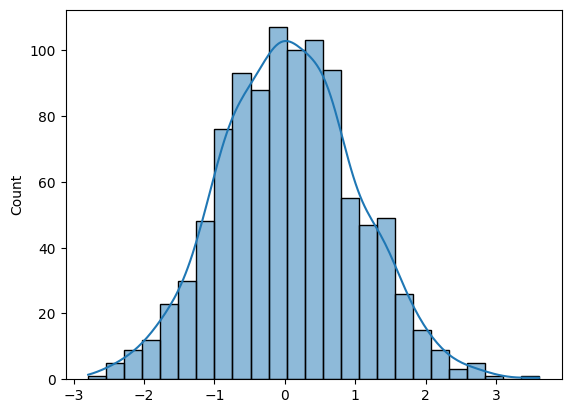

In [14]:
sample = np.random.normal(0, 1, size=1000)
sns.histplot(sample, kde=True)